# Can Ozempic cure Obseity and Hypertension?
# Zhouling Shen

## 1. Exploratory Data Analysis (EDA) 


In [1]:
import pandas as pd
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegressionCV
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

In [2]:
Medical_df = pd.read_csv("Medical_claims.csv")
Scripts_df = pd.read_csv("Scripts.csv")

C:\Users\szhou\AppData\Local\Temp\ipykernel_36600\587225738.py:2: DtypeWarning: Columns (9,10,29,43) have mixed types. Specify dtype option on import or set low_memory=False.
  Scripts_df = pd.read_csv("Scripts.csv")


# Filtered Dataset who received Ozempic

https://www.uhcprovider.com/content/dam/provider/docs/public/policies/attachments/self-administered-medications-list.pdf
From this website, I see that procedure code J3490 and C9399 are both for Ozempic

In [5]:
# Filtered_df
filtered_df = Medical_df[(Medical_df['proc_code'] == "J3490") | (Medical_df['proc_code'] == "C9399")]
num_rows_filtered = filtered_df.shape[0]
# Calculate the number of unique journey_id/patient who were given Ozempic
unique_journey_ids = filtered_df['journey_id'].nunique()
print(f"Number of unique journey_id who were given Ozempic: {unique_journey_ids}")

# Calculate how many unique journey_id/patient in the entire dataset of Medical_df
unique_journey_ids_total = Medical_df['journey_id'].nunique()
print(f"Number of unique journey_id in the entire Medial_df dataset: {unique_journey_ids_total}")

Number of unique journey_id who were given Ozempic: 456
Number of unique journey_id in the entire Medial_df dataset: 27377


Based on above calculations, out of all the 623525 entires(27377 patients) in the entire dataset Medical_df, only 778 entries(456 patients) indicated that Ozempic was given. With relatively very small sample for Ozempic treatment, it is very possible that in later model building for measuring Ozempic treatment effect, the model can be really hard to detect the true effect. 

https://dailymed.nlm.nih.gov/dailymed/drugInfo.cfm?setid=adec4fd2-6858-4c99-91d4-531f5f2a2d79 
Based on above websites, NDC code for Ozempic contains "169413", "1694181", "1694772"

In [7]:
filtered_ndc = Scripts_df[Scripts_df['ndc'].astype(str).str.contains("169413|1694181|1694772")]

# Calculate the count of 'ndc' after filtering
ndc_count = filtered_ndc['ndc'].count()
print(f"Count of 'ndc' codes in Scrips_df indicates Ozempic prescripted: {ndc_count}")

# Calculate the number of unique journey_id/patient who were given Ozempic
unique_journey_ids = filtered_ndc['journey_id'].nunique()
print(f"Number of unique journey_id in Scripts_df who were given Ozempic: {unique_journey_ids}")

# Calculate how many unique journey_id/patient in the entire dataset of Scripts_df
unique_journey_ids_total = Scripts_df['journey_id'].nunique()
print(f"Number of unique journey_id in the entire Scripts_df dataset: {unique_journey_ids_total}")

Count of 'ndc' codes in Scrips_df indicates Ozempic prescripted: 10740
Number of unique journey_id in Scripts_df who were given Ozempic: 1012
Number of unique journey_id in the entire Scripts_df dataset: 14832


Similar as above conclusion, out of all the 894623 entires(14832 patients) in the entire dataset Scripts_df, only 10740 entries(1012 patients) indicated that Ozempic was given. With relatively very small sample for Ozempic treatment, it can be really hard using these datasets to detect the true effect of Ozempic. 

# Count of each Diagnosis for all Patients

In [9]:
# 1. Select 'diag_' columns
specific_diag_columns = ['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5']
diag_columns = [col for col in Medical_df.columns if col in specific_diag_columns]
df_diag = Medical_df[diag_columns]

# 2. Combine values 
combined_list = df_diag.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

# 3. Process first three digits
first_three_counts = {}
for diag_code in combined_list:
    first_three = diag_code[:3]
    first_three_counts[first_three] = first_three_counts.get(first_three, 0) + 1

In [10]:
import operator
# Sort the dictionary items by count (descending order)
sorted_counts = sorted(first_three_counts.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts:
    print(items)

('E11', 165866)
('I10', 155900)
('E78', 100273)
('E66', 63807)
('Z00', 53993)
('Z68', 50581)
('M25', 37175)
('M54', 35434)
('Z13', 25261)
('Z79', 24134)
('Z71', 23680)
('E55', 23574)
('N18', 23362)
('M79', 23265)
('Z12', 23228)
('E03', 21175)
('R73', 20044)
('Z01', 19651)
('G47', 18641)
('R10', 18118)
('N39', 15990)
('D64', 15438)
('R07', 15402)
('M17', 14234)
('I25', 13795)
('R53', 12889)
('I50', 12639)
('Z20', 11640)
('F41', 11613)
('R06', 11034)
('J44', 10925)
('K21', 10673)
('Z23', 10465)
('G89', 9860)
('I48', 9515)
('Z11', 9506)
('E87', 9274)
('I11', 8764)
('J45', 8610)
('N40', 8420)
('F33', 8147)
('M19', 8105)
('F32', 7607)
('D50', 7493)
('J96', 7151)
('M47', 7051)
('M51', 6795)
('I12', 6624)
('R05', 6326)
('F17', 6314)
('B35', 6102)
('U07', 5994)
('R79', 5918)
('K76', 5774)
('M62', 5748)
('L97', 5742)
('A41', 5682)
('N17', 5612)
('L03', 5527)
('Z51', 5495)
('R68', 5332)
('Z86', 5317)
('R00', 5309)
('R51', 5160)
('R94', 5112)
('Z99', 5088)
('R26', 5002)
('R42', 4968)
('I70', 4911

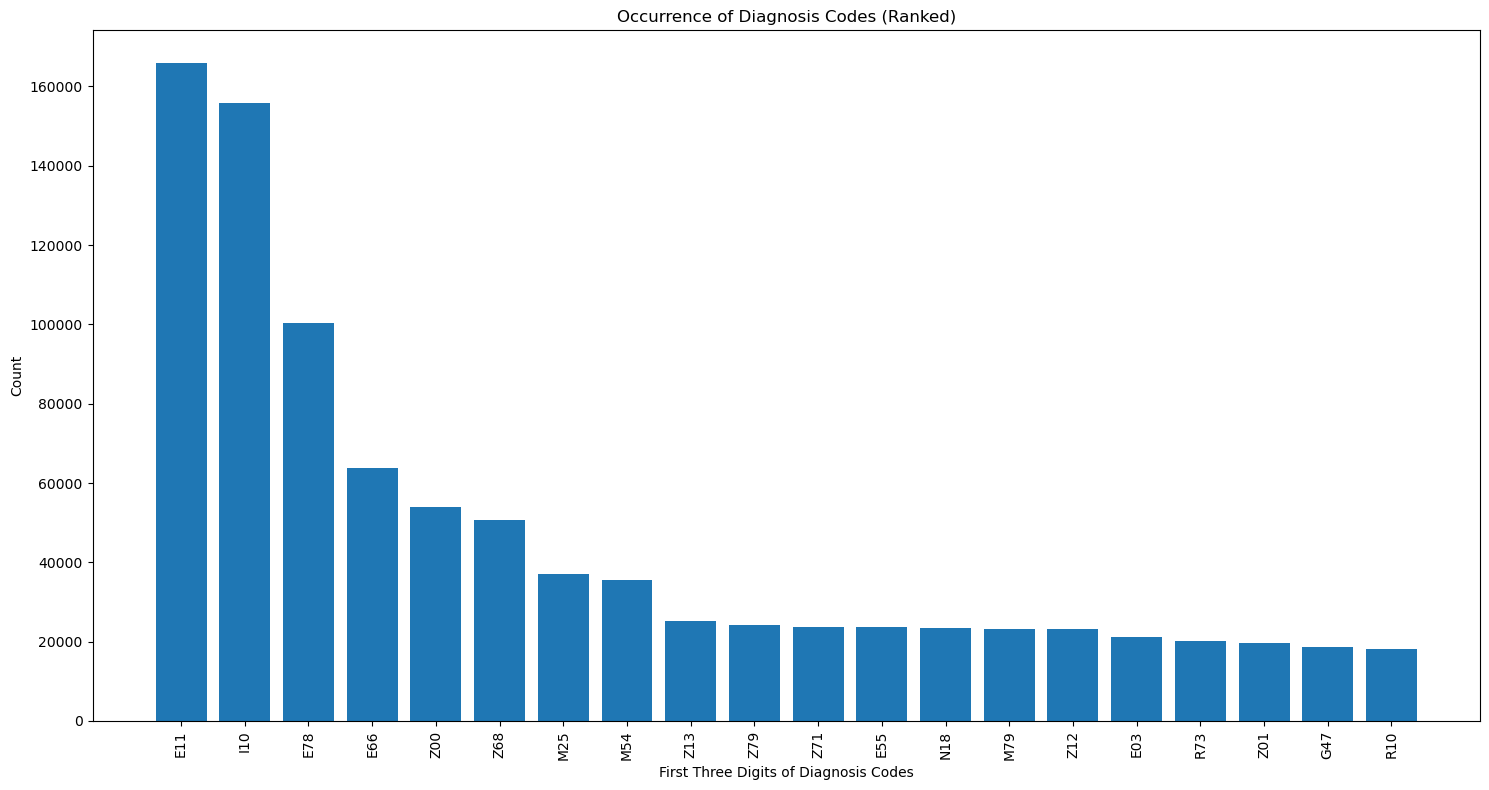

In [11]:
# Extract labels and values for the top 20 categories
N = 20  
top_sorted_counts = sorted_counts[:N]
labels = [item[0] for item in top_sorted_counts]
values = [item[1] for item in top_sorted_counts]

# Create the bar chart
plt.figure(figsize=(15, 8)) 
plt.bar(labels, values)

# Labels and title 
plt.xlabel("First Three Digits of Diagnosis Codes")
plt.ylabel("Count")
plt.title("Occurrence of Diagnosis Codes (Ranked)")

plt.xticks(rotation=90, ha='center')  # Rotate labels to 90 degrees for better clarity

plt.tight_layout()
plt.show()

# TOP 5 OCC for all patients
E11  Type 2 diabetes mellitus

I10  Essential (primary) hypertension --> our targeted population

E78  Disorders of lipoprotein metabolism and other lipidemias

E66  Overweight and obesity --> our targeted population

Z00  Encounter for general examination without complaint, suspected or reported diagnosis

## Count of each Diagnosis for Filtered patients (who use Ozempic)

In [12]:
# 1. Select 'diag_' columns on "filter_df" which contains the rows that patients used Ozempic
diag_columns_filtered = [col for col in filtered_df.columns if col in specific_diag_columns]
df_diag_filtered = filtered_df[diag_columns_filtered]

# 2. Combine values 
combined_list_filtered = df_diag_filtered.values.flatten().tolist()
combined_list_filtered = [x for x in combined_list_filtered if pd.notna(x)]

# 3. Process first three digits 
first_three_counts_filtered = {}
for diag_code in combined_list_filtered:
    first_three = diag_code[:3]
    first_three_counts_filtered[first_three] = first_three_counts_filtered.get(first_three, 0) + 1

sorted_counts_filtered = sorted(first_three_counts_filtered.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts_filtered:
    print(items)

('I10', 243)
('E11', 198)
('E78', 136)
('E66', 74)
('Z79', 73)
('I25', 60)
('N18', 58)
('M54', 55)
('R07', 47)
('I48', 45)
('D68', 40)
('J45', 37)
('F41', 37)
('Z51', 37)
('Z99', 36)
('G89', 35)
('M19', 34)
('Z68', 33)
('M25', 33)
('K21', 32)
('Z87', 28)
('R10', 26)
('J44', 25)
('Z88', 25)
('M79', 25)
('N25', 25)
('G47', 23)
('E03', 23)
('D50', 21)
('M17', 20)
('Z20', 20)
('H25', 19)
('Z85', 19)
('Z30', 19)
('M47', 19)
('C50', 19)
('F17', 19)
('R51', 18)
('I50', 18)
('F32', 18)
('Z86', 16)
('M51', 16)
('R06', 15)
('Z90', 15)
('I12', 15)
('R11', 14)
('D63', 14)
('F31', 14)
('K59', 13)
('R94', 13)
('Z11', 13)
('Z01', 13)
('K29', 12)
('K44', 12)
('R05', 12)
('R26', 12)
('M48', 12)
('I11', 12)
('R52', 12)
('K57', 11)
('Z95', 11)
('D64', 11)
('R19', 11)
('F33', 11)
('I49', 10)
('I13', 10)
('C77', 10)
('J20', 10)
('H40', 10)
('F43', 10)
('N13', 10)
('C61', 9)
('N81', 9)
('D25', 9)
('N20', 9)
('C78', 9)
('Z91', 9)
('G43', 8)
('K80', 8)
('M70', 8)
('C55', 8)
('R60', 8)
('Z98', 8)
('K43', 8)
('

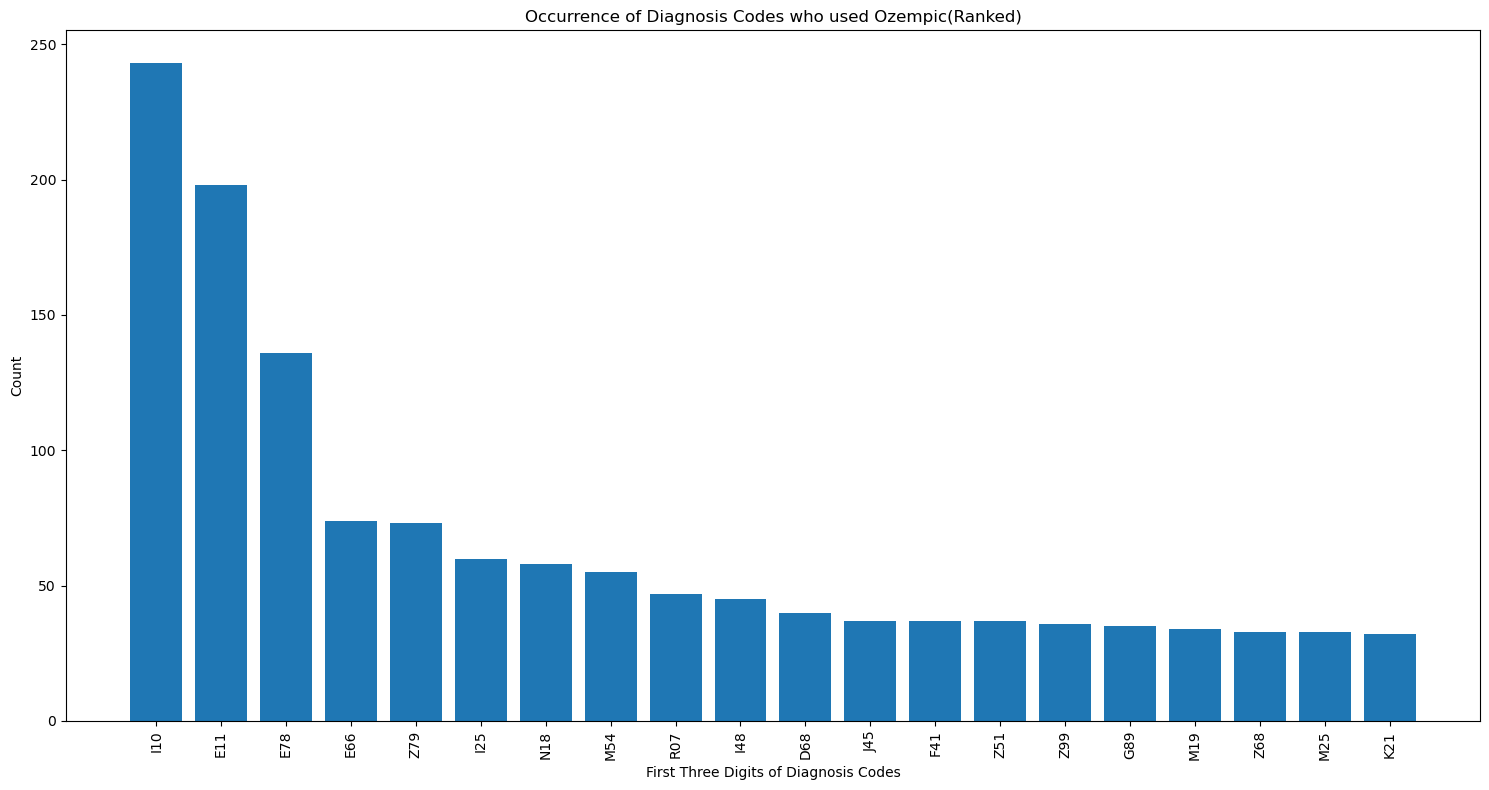

In [13]:
# Extract labels and values for the top 20 categories
N = 20 
top_sorted_counts = sorted_counts_filtered[:N]
labels = [item[0] for item in top_sorted_counts]
values = [item[1] for item in top_sorted_counts]

# Create the bar chart
plt.figure(figsize=(15, 8)) 
plt.bar(labels, values)

plt.xlabel("First Three Digits of Diagnosis Codes")
plt.ylabel("Count")
plt.title("Occurrence of Diagnosis Codes who used Ozempic(Ranked)")

plt.xticks(rotation=90, ha='center')  # Rotate labels to 90 degrees for better clarity

plt.tight_layout()

plt.show()

# TOP 4 OCC for patients who were given Ozempic
I10  Essential (primary) hypertension --> our targeted population

E11  Type 2 diabetes mellitus

E78  Disorders of lipoprotein metabolism and other lipidemias

E66  Overweight and obesity --> our targeted population


# Count of each Zip code for all Patients

In [14]:
df_zip = Medical_df['patient_short_zip']

# 2. Combine values 
combined_list_zip = df_zip.values.flatten().tolist()
combined_list_zip = [x for x in combined_list_zip if pd.notna(x)]

# 3. Iterate each zip code
zips = {}
for z in combined_list_zip:
    zips[z] = zips.get(z, 0) + 1

In [15]:
sorted_counts_zip = sorted(zips.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts_zip:
    print(items)

(900.0, 180469)
(922.0, 166422)
(908.0, 55562)
(921.0, 51190)
(910.0, 48395)
(913.0, 34571)
(912.0, 34143)
(911.0, 32244)
(853.0, 6499)
(857.0, 2952)
(852.0, 2399)
(864.0, 1480)
(856.0, 1456)
(350.0, 1259)
(351.0, 637)
(352.0, 530)
(863.0, 495)
(859.0, 447)
(855.0, 430)
(995.0, 370)
(996.0, 359)
(860.0, 311)
(997.0, 291)
(344.0, 58)
(194.0, 42)
(850.0, 39)
(272.0, 33)
(891.0, 32)
(923.0, 25)
(304.0, 25)
(998.0, 23)
(320.0, 22)
(91.0, 22)
(629.0, 18)
(606.0, 18)
(770.0, 17)
(105.0, 15)
(787.0, 12)
(841.0, 12)
(895.0, 9)
(483.0, 9)
(333.0, 9)
(328.0, 8)
(527.0, 8)
(112.0, 8)
(370.0, 8)
(372.0, 7)
(773.0, 7)
(722.0, 7)
(170.0, 7)
(330.0, 6)
(924.0, 6)
(334.0, 6)
(528.0, 5)
(720.0, 5)
(752.0, 4)
(776.0, 4)
(524.0, 4)
(337.0, 4)
(612.0, 3)
(999.0, 3)
(88.0, 3)
(503.0, 3)
(619.0, 3)
(890.0, 3)
(933.0, 2)
(774.0, 2)
(631.0, 2)
(74.0, 2)
(478.0, 2)
(782.0, 2)
(523.0, 2)
(917.0, 2)
(554.0, 2)
(200.0, 2)
(442.0, 2)
(109.0, 1)
(481.0, 1)
(925.0, 1)
(610.0, 1)
(495.0, 1)
(321.0, 1)
(427.0, 1)
(616

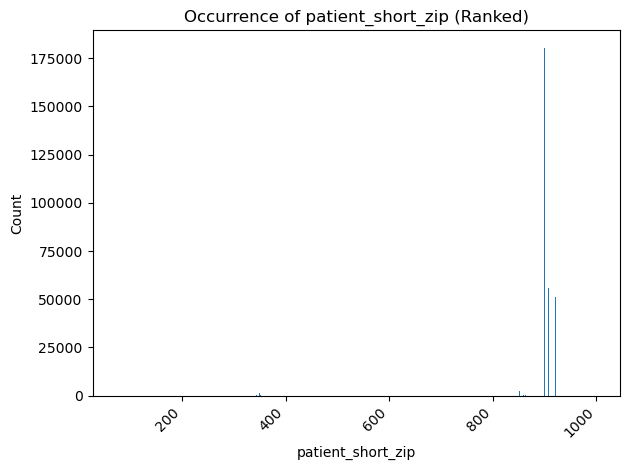

In [16]:
# Extract labels and values
labels = [item[0] for item in sorted_counts_zip]
values = [item[1] for item in sorted_counts_zip]

# Create the bar chart
plt.bar(labels, values)

# Labels and title 
plt.xlabel("patient_short_zip")
plt.ylabel("Count")
plt.title("Occurrence of patient_short_zip (Ranked)")

# Rotate x labels if too long
if len(labels) > 5:  
    plt.xticks(rotation=45, ha='right')  

plt.tight_layout()

plt.show()

Most of the total populations are from state of California. 

# Count of each Zip code for Filtered patients (who use Ozempic)

In [17]:
df_zip_filtered = filtered_df['patient_short_zip']

# 2. Combine values 
combined_list_zip_filtered = df_zip_filtered.values.flatten().tolist()
combined_list_zip_filtered = [x for x in combined_list_zip_filtered if pd.notna(x)]

# 3. Iterate each zip
zips = {}
for z in combined_list_zip_filtered:
    zips[z] = zips.get(z, 0) + 1

sorted_counts_zip_filtered = sorted(zips.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts_zip_filtered:
    print(items)

(921.0, 288)
(922.0, 140)
(908.0, 131)
(910.0, 95)
(911.0, 49)
(912.0, 48)
(853.0, 12)
(852.0, 7)
(864.0, 3)
(350.0, 2)
(857.0, 2)
(859.0, 1)


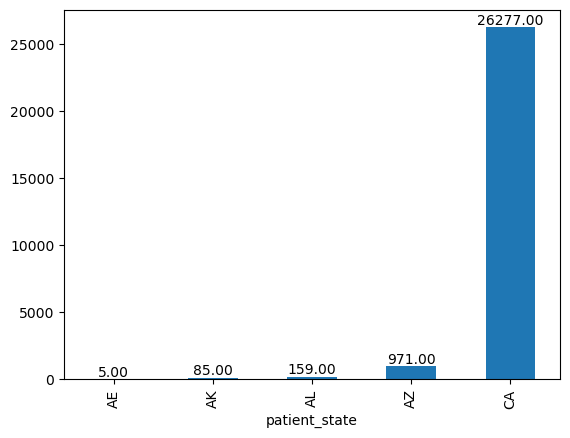

In [18]:
# Check the number of patients' states
patient_state_cnt = Medical_df.groupby('patient_state')['journey_id'].nunique()

patient_state_cnt .plot.bar()
for i, v in enumerate(patient_state_cnt):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

Most of the patients who were given Ozempic are aggregated at statue of California, and Arizona. State can be a good confounder to determine its effect on Ozempic treatment effect, 

# Obseity

In [19]:
df_obesity = Medical_df[Medical_df['diag_1'].str.startswith("E66")|
      Medical_df['diag_2'].str.startswith("E66")|
      Medical_df['diag_3'].str.startswith("E66")|
      Medical_df['diag_4'].str.startswith("E66")|
      Medical_df['diag_5'].str.startswith("E66")]

In [20]:
df_obesity['diag'] = "Obesity"
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63026 entries, 22 to 623506
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   journey_id         63026 non-null  object 
 1   episode_id         63026 non-null  object 
 2   visit_id           62900 non-null  object 
 3   encounter_id       63026 non-null  object 
 4   claim_date         63026 non-null  object 
 5   patient_state      63026 non-null  object 
 6   patient_short_zip  63018 non-null  float64
 7   patient_age        62224 non-null  float64
 8   patient_gender     63023 non-null  object 
 9   place_of_service   50211 non-null  object 
 10  visit_type         59858 non-null  object 
 11  payor              60251 non-null  object 
 12  payor_channel      58314 non-null  object 
 13  ref_npi            24221 non-null  float64
 14  hcp_npi            49907 non-null  float64
 15  hcp_taxonomy       49357 non-null  object 
 16  hcp_specialty      49357 

C:\Users\szhou\AppData\Local\Temp\ipykernel_36600\1133912733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obesity['diag'] = "Obesity"


In [21]:
patients_gender_cnt = df_obesity.groupby(['diag', 'patient_gender'])['journey_id'].nunique().reset_index(name = 'count')
total_cnt = patients_gender_cnt.groupby('diag')['count'].transform('sum')
patients_gender_cnt['gender_ratio'] = patients_gender_cnt['count']/total_cnt
patients_gender_cnt

,diag,patient_gender,count,gender_ratio
0,Obesity,F,6422,0.587235
1,Obesity,M,4514,0.412765


There is some difference between the Obesity rate amoung females and males. The rate amoung females is relatively bigger than that for males. Gender could also be a potential confounder that could effect people diagnosised as Obesity or not. 

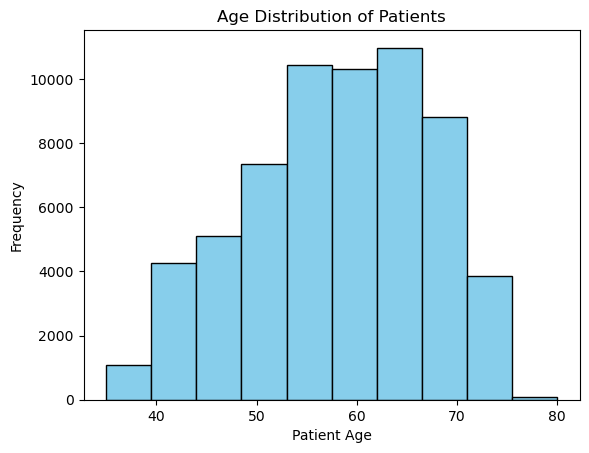

In [22]:
# Age distribution of patients 
plt.hist(df_obesity['patient_age'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients')

# Show the histogram
plt.show()

Most of the patients who have Obesity are 40-75 years old, which is also our targeted population. 

# Hypertension

In [23]:
df_Hyper = Medical_df[Medical_df['diag_1'].str.startswith("I10")|
      Medical_df['diag_2'].str.startswith("I10")|
      Medical_df['diag_3'].str.startswith("I10")|
      Medical_df['diag_4'].str.startswith("I10")|
      Medical_df['diag_5'].str.startswith("I10")]

In [24]:
df_Hyper['diag'] = "Hypertension"
df_Hyper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154197 entries, 6 to 623524
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         154197 non-null  object 
 1   episode_id         154197 non-null  object 
 2   visit_id           154005 non-null  object 
 3   encounter_id       154197 non-null  object 
 4   claim_date         154197 non-null  object 
 5   patient_state      154197 non-null  object 
 6   patient_short_zip  154197 non-null  float64
 7   patient_age        152871 non-null  float64
 8   patient_gender     154177 non-null  object 
 9   place_of_service   117084 non-null  object 
 10  visit_type         148911 non-null  object 
 11  payor              148431 non-null  object 
 12  payor_channel      142942 non-null  object 
 13  ref_npi            66804 non-null   float64
 14  hcp_npi            110959 non-null  float64
 15  hcp_taxonomy       109870 non-null  object 
 16  hcp_spe

C:\Users\szhou\AppData\Local\Temp\ipykernel_36600\2618863379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Hyper['diag'] = "Hypertension"


In [25]:
patients_gender_cnt = df_Hyper.groupby(['diag', 'patient_gender'])['journey_id'].nunique().reset_index(name = 'count')
total_cnt = patients_gender_cnt.groupby('diag')['count'].transform('sum')
patients_gender_cnt['gender_ratio'] = patients_gender_cnt['count']/total_cnt
patients_gender_cnt

,diag,patient_gender,count,gender_ratio
0,Hypertension,F,10226,0.567386
1,Hypertension,M,7797,0.432614


There is some difference between the Hypertension rate amoung females and males. The rate amoung females is relatively bigger than that for males. Gender could also be a potential confounder that could effect people diagnosised as Hypertension or not. 

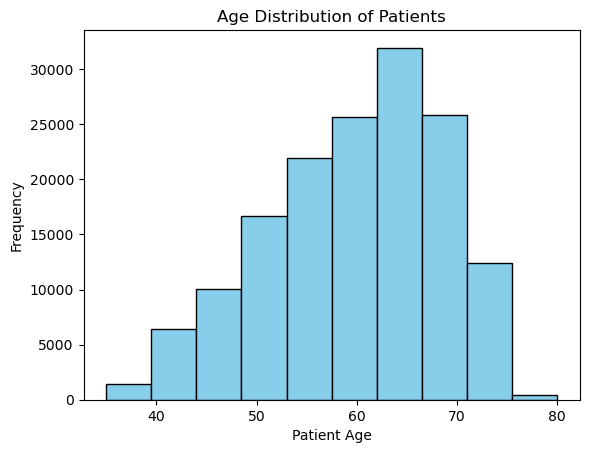

In [26]:
# Age distribution of patients 
plt.hist(df_Hyper['patient_age'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients')

# Show the histogram
plt.show()

Most of the patients who have Hypertension are 40-75 years old, which is also our targeted population.

Missing values will be handled below.

# 2.  Data Preprocessing and Merging 

## Merge the dataset

In [27]:
# df and df2 are modified datasets
df = Medical_df.copy()
df2 = Scripts_df.copy()

https://www.cms.gov/icd10m/version37-fullcode-cms/fullcode_cms/P1508.html
From this website, I see that diagnosis code that contains "E66" and also "Z6854" covers "Obesity". 

https://www.icd10data.com/ICD10CM/Codes/I00-I99/I10-I1A
And from above website, I see that diagnosis code that contains "I10" covers "Hypertensive diseases". 

I will be using above information to select patients with "Obesity" and "Hypertension"

In [28]:
# Filter only patients age 40-75 as this is our target
df = df[(df['patient_age'] >= 40) & (df['patient_age'] <= 75)]

df = df[df['diag_list'].astype(str).str.contains('E66|I10|Z6854', na=False)]

df2 = df2[df2['diagnosis_code'].str.startswith("E66")|
      df2['diagnosis_code'].str.startswith("I10") | 
      df2['diagnosis_code'].str.startswith("Z6854")  ]

https://www.uhcprovider.com/content/dam/provider/docs/public/policies/attachments/self-administered-medications-list.pdf
From this website, I see that the procedure code for Ozempic includes "J3490" and "C9399", which I will be using to filter below.

In [29]:
# Filter only the data where it is after the first Ozempic "J3490" and "C9399" came out
ozempic_data = df[df['proc_code'].isin(['J3490', 'C9399'])]
ozempic_data_sorted = ozempic_data.sort_values(by='claim_date')
first_ozempic_date = ozempic_data_sorted.iloc[0]['claim_date']
df = df[df['claim_date'] > first_ozempic_date]

In [30]:
# Drop duplicate columns (these columns already exists on df)
df2.drop(['patient_gender', 'patient_state'], axis=1, inplace=True)
# Merge the dataset using "journey_id" 
merged_df = pd.merge(df, df2, on='journey_id')

## Variables to be included

In [32]:
columns_of_interest = ['journey_id', 'episode_id', 'encounter_id', 'cohort_id', 'claim_date', 
                       'patient_state', 'patient_short_zip', 'patient_age', 'patient_gender', 
                       'place_of_service_x', 'visit_type', 'payor', 'payor_channel','ndc',
                       'hcp_npi', 'hcp_taxonomy', 'hcp_specialty', 'hco_npi', 
                       'diag_list', 'proc_code', 
                        'line_charge', 'claim_charge', 
                       'smart_allowed','pharmacy_npi', 'prescriber_npi', 'fill_number',
                      'number_of_refills_authorized', 'diagnosis_code',
                      'quantity_dispensed', 'days_supply']

merged_df = merged_df[columns_of_interest]

This selection above contains the confounders that I will be using for my model later as well as some necessary identifiers (eg. 'journey_id'). Also including variables I am going to use to build my treatment variable('proc_code')and outcome variable('diag_list' and 'diagnosis_code'). 

For the choice of confounders, below is my reasoning:

As mentioned in above EDA, state, zip, age, and gender are the confounders that I found could be useful to predict the treatment effect. Other than these that were already identified, I included variables like "place_of_service" and "visit_type" as these variables could impact the costs as well as the outcomes of diagnosis. Variables like "Payor" and "payor_channel" can reflect the type of insurance plan, which could affect the coverage as well as the costs of medicine, which indirectly could affect the outcomes. 'line_charge', 'claim_charge','smart_allowed'provides some information about the charges of treatment which is important to analyze the costs and reimbursement. Variables like 'hcp_npi', 'hcp_taxonomy', 'hcp_specialty', 'hco_npi', pharmacy_npi', 'prescriber_npi' can identify the differences between different healthcare professionals and organizations, which should be important to understand the treatment and outcomes. Variables like 'fill_number','number_of_refills_authorized','quantity_dispensed', 'days_supply' identifies the fill sequence of prescriptions, over of under prescribing, and medication dosing, treatment duration, which should be beneficial to determine the outcomes as well. 

## Encode Categorical Variables, except Y, and D variables which will be done later

In [35]:
merged_df_encoded = merged_df.copy()
from sklearn.preprocessing import LabelEncoder
categorical_columns = [
                       'patient_state', 'patient_short_zip', 'patient_gender', 
                       'place_of_service_x', 'visit_type', 'payor', 'payor_channel',
                       'hcp_npi', 'hcp_taxonomy', 'hcp_specialty', 'hco_npi', 
                         'pharmacy_npi', 'prescriber_npi']

# Apply LabelEncoder to categorical features
for c in categorical_columns:
    lbl = LabelEncoder() 
    lbl.fit(list(merged_df_encoded[c].values)) 
    merged_df_encoded[c] = lbl.transform(list(merged_df_encoded[c].values))


## Missing Values 

In [37]:
missing_values = merged_df_encoded.isnull().sum()
missing_values_sorted = missing_values.sort_values(ascending=False)
print(missing_values_sorted)

number_of_refills_authorized    18922
proc_code                       12206
journey_id                          0
episode_id                          0
quantity_dispensed                  0
diagnosis_code                      0
fill_number                         0
prescriber_npi                      0
pharmacy_npi                        0
smart_allowed                       0
claim_charge                        0
line_charge                         0
diag_list                           0
hco_npi                             0
hcp_specialty                       0
hcp_taxonomy                        0
hcp_npi                             0
ndc                                 0
payor_channel                       0
payor                               0
visit_type                          0
place_of_service_x                  0
patient_gender                      0
patient_age                         0
patient_short_zip                   0
patient_state                       0
claim_date  

In [38]:
#number_of_refills_authorized: fill empty with zero, assuming empty means no refills authorized.
merged_df_encoded['number_of_refills_authorized'].fillna(0, inplace=True)

In [39]:
missing_values = merged_df_encoded.isnull().sum()
missing_values_sorted = missing_values.sort_values(ascending=False)
print(missing_values_sorted)

proc_code                       12206
journey_id                          0
episode_id                          0
quantity_dispensed                  0
diagnosis_code                      0
number_of_refills_authorized        0
fill_number                         0
prescriber_npi                      0
pharmacy_npi                        0
smart_allowed                       0
claim_charge                        0
line_charge                         0
diag_list                           0
hco_npi                             0
hcp_specialty                       0
hcp_taxonomy                        0
hcp_npi                             0
ndc                                 0
payor_channel                       0
payor                               0
visit_type                          0
place_of_service_x                  0
patient_gender                      0
patient_age                         0
patient_short_zip                   0
patient_state                       0
claim_date  

## Encode Treatment variables using proc_code, ndc --> treated_with_ozempic

As mentioned earlier, 
https://dailymed.nlm.nih.gov/dailymed/drugInfo.cfm?setid=adec4fd2-6858-4c99-91d4-531f5f2a2d79 
    Above websites contains the NDC code for Ozempic
   the NDC code for Ozempic contains "169413", "1694181", "1694772"

https://www.uhcprovider.com/content/dam/provider/docs/public/policies/attachments/self-administered-medications-list.pdf
J3490 and C9399 are both for Ozempic
   
Below I Created a new column named treated_with_ozempic which contains binary values 1 or 0 indicating whether each the patient has been treated Ozempic or not.

In [40]:
merged_df_encoded['treated_with_ozempic'] = ((merged_df_encoded['proc_code'] == 'J3490') | (merged_df_encoded['proc_code'] == 'C9399') |
                              merged_df_encoded['ndc'].astype(str).str.contains('169413|1694181|1694772')).astype(int)

In [41]:
# Drop proc_code and ndc
merged_df_encoded = merged_df_encoded.drop(columns=['proc_code', 'ndc'])

In [42]:
# Counting the occurrences of each unique value in the 'treated_with_ozempic' column
treatment_effect_counts = merged_df_encoded['treated_with_ozempic'].value_counts()

# Displaying the counts
print(treatment_effect_counts)

treated_with_ozempic
0    216863
1      2198
Name: count, dtype: int64


Above result aligns with earlier conclusion that patients who received Ozempic treatement takes a really small part amoung the whole population, which means later on to detect the true Ozempic treatment effect could be hard. 

## Create Ozempic_effect column as our outcome variable, 


https://www.ssa.gov/policy/docs/workingpapers/wp113.html#:~:text=Likewise%2C%20the%20secondary%20diagnosis%20should,condition%20following%20the%20primary%20impairment.

On this article, it states that later diagnosis (for example Tertiary Diagnosis, 4th Diagnosis) means they are less severe than the earlier diagnosis (for example Primary or secondary diagnosis). Based on this information, I defined my outcome variable as 1 if obesity and hypertension changes from more priamry diagnosis to less primary diagnosis using "diag_list", and if its not changing to less primary diagnosis mark my outcome variable as 0. 

In [43]:
merged_df_final = merged_df_encoded.copy()

In [45]:
import pandas as pd

# Method to define my outcome variable
def calculate_ozempic_effect(df):
    effect_dict = {}  # Store the effect for each journey_id: 0 for no effect, 1 for effect

    # Target substrings for Obesity and hypertension
    target_substrings = ['E66', 'I10', 'Z6854']
    # Loop through each unique journey_id/patient
    for journey_id in df['journey_id'].unique():
        # Sort the visits in each unique journey_id by the index of original dataset assuming the original dataset is in chronological order
        current_journey = df[df['journey_id'] == journey_id].sort_index()
        
        # Initialize last known positions for each targeted codes
        last_positions = {substring: -1 for substring in target_substrings}

        # Initialize with "no effect"
        has_changed = 0
        
        # For each rows/visits in the current_journey/patient
        for _, row in current_journey.iterrows():
            # Split each diag_list which seperates code with ","
            current_diag_list = row['diag_list'].split(',')

            # Check for each targeted substring
            for substring in target_substrings:
                # Set current position of each targeted code, set to None if not found
                current_position = next((i for i, code in enumerate(current_diag_list) if substring in code), None)
                
                # If current_position is None, the code is not currently in the current code in "diag_list"
                if current_position is not None:
                    # Only if the code was in previous position and if the current one is later, change effect to 1
                    if last_positions[substring] != -1 and current_position > last_positions[substring]:
                        has_changed = 1
                    
                    # Update the last known position for this substring/code
                    last_positions[substring] = current_position

        # Update the effect for each rows in the same journey_id
        effect_dict.update(dict.fromkeys(current_journey.index, has_changed))

    # Assign the ozempic_effect values
    df['ozempic_effect'] = df.index.map(effect_dict)

calculate_ozempic_effect(merged_df_final)
print(merged_df_final.head())


                         journey_id                        episode_id  \
0  000072bc05e31d0126475c7a3e771af1  4d648af34c9a5da09e9bf2c9fed7263d   
1  000072bc05e31d0126475c7a3e771af1  4d648af34c9a5da09e9bf2c9fed7263d   
2  000072bc05e31d0126475c7a3e771af1  4d648af34c9a5da09e9bf2c9fed7263d   
3  000072bc05e31d0126475c7a3e771af1  4d648af34c9a5da09e9bf2c9fed7263d   
4  000072bc05e31d0126475c7a3e771af1  4d648af34c9a5da09e9bf2c9fed7263d   

                                        encounter_id  cohort_id  claim_date  \
0  2e44e65bde3c9e9b568c6b82d41ff50c1c5ba7300d845b...         16  2023-02-03   
1  2e44e65bde3c9e9b568c6b82d41ff50c1c5ba7300d845b...         16  2023-02-03   
2  2e44e65bde3c9e9b568c6b82d41ff50c1c5ba7300d845b...         16  2023-02-03   
3  2e44e65bde3c9e9b568c6b82d41ff50c1c5ba7300d845b...         16  2023-02-03   
4  2e44e65bde3c9e9b568c6b82d41ff50c1c5ba7300d845b...         16  2023-02-03   

   patient_state  patient_short_zip  patient_age  patient_gender  \
0              3  

In [46]:
# Counting the occurrences of each unique value in the 'treated_with_ozempic' column
ozempic_outcome_counts = merged_df_final['ozempic_effect'].value_counts()

# Displaying the counts
print(ozempic_outcome_counts)

ozempic_effect
1    189385
0     29676
Name: count, dtype: int64


# 3. Causal Analysis Setup (15 pts):
1. Discuss the potential endogeneity issues in estimating the treatment effect of Ozempic on the
target population.
2. Outline your strategy for addressing endogeneity, referencing the big-picture problem of
causality and treatment effect estimation discussed in class.

Above I mentioed the strategy why I chose the confounders/addressing endogeneity, however choosing these confounders from the dataset might still arise issues for variables missed. For example in the dataset, variables like 
patients lifestyle, eg. diet, exercie, smoking status, alcohol consumption are not considered. Also social status like income, education, employment could also influence the outcome of Obesity and Hypertenstion, and these are not included in the original dataset either. Due to the possibility of omitted variables, there is possibility of less power to estimate the treatment effect. 

On the other hand, as discussed in class, in real life, there can be millions of confounders that could influence our outcome, its impossible to include all of them in our model. Using Double lasso regression which can help with shrinking the confounders to select a subset of more relavent variables from the original selected variables, which helps mitigate the issues arising from multicollinearity. Also, using the 2-stage process, by controlling for a large number of potential confounders, double Lasso helps to isolate the variation in the treatment variable. 

# 4. Model Development: Double-Lasso / Treatment Effect Lasso (25 pts):
1. Implement the double-lasso technique to estimate the treatment effect of Ozempic,
considering the endogeneity of treatment assignment.
2. Justify the inclusion of variables in your model, explaining the rationale behind each decision.


Outlining the varaibles I will be using in my model:

Confounders chosen based on above discussion: patient_state, patient_short_zip, patient_age, patient_gender, place_of_service_x, visit_type, payor, payor_channel, hcp_npi, hcp_taxonomy, hcp_specialty,  hco_npi, line_charge, claim_charge, smart_allowed, pharmacy_npi, prescriber_npi, fill_number, number_of_refills_authorized, quantity_dispensed, days_supply

Y: ozempic_effect

Treatement variable: treated_with_ozempic

In [48]:
# Code credit from Jake
class SelectiveRegularizationLinearRegression:
    def __init__(self, alpha, apply_penalty, tolerance=1e-4, max_iterations=1000):
        self.alpha = alpha
        self.tolerance = tolerance
        self.apply_penalty = apply_penalty
        self.max_iterations = max_iterations
        self.w = None
        
    def _predicted_values(self, X, w):
        return np.matmul(X, w)

    def _rho_compute(self, y, X, w, j):
        X_k = np.delete(X, j, 1)
        w_k = np.delete(w, j)
        predict_k = self._predicted_values(X_k, w_k)
        residual = y - predict_k
        rho_j = np.sum(X[:, j] * residual)
        return rho_j

    def _z_compute(self, X):
        return np.sum(X * X, axis=0)
    
    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        n_samples, n_features = X.shape
        if not self.w:
            self.w = np.zeros(n_features)
        z = self._z_compute(X)
        for iteration in range(self.max_iterations):
            max_step = 0
            for j in range(n_features):
                rho_j = self._rho_compute(y, X, self.w, j)
                w_j_old = self.w[j]
                if j == 0:
                    self.w[j] = rho_j / z[j]
                else:
                    if self.apply_penalty[j]:
                        if rho_j < -self.alpha * n_samples:
                            self.w[j] = (rho_j + self.alpha * n_samples) / z[j]
                        elif -self.alpha * n_samples <= rho_j <= self.alpha * n_samples:
                            self.w[j] = 0.
                        elif rho_j > self.alpha * n_samples:
                            self.w[j] = (rho_j - self.alpha * n_samples) / z[j]
                    else:
                        self.w[j] = rho_j / z[j]
                max_step = max(max_step, abs(self.w[j] - w_j_old))
            if max_step < self.tolerance:
                break
        return self

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        if self.w is None:
            raise ValueError("Model is not fitted yet!")
        return self._predicted_values(X, self.w)


In [50]:
confounders = ['patient_state', 'patient_short_zip', 'patient_age', 'patient_gender', 
               'place_of_service_x', 'visit_type', 'payor', 'payor_channel', 'hcp_npi', 
               'hcp_taxonomy', 'hcp_specialty', 'hco_npi', 'line_charge', 'claim_charge', 
               'smart_allowed', 'pharmacy_npi', 'prescriber_npi', 'fill_number', 
               'number_of_refills_authorized', 'quantity_dispensed', 'days_supply']


I chose 80/20 split as considering the small sample of patients who were actually given the Ozempic and the difficulties it causes to detect the true effect of Ozempic. A large training set provides more data to model this rare event, potentially improving the model's ability to learn the treatment effect. 

In [51]:
X = merged_df_final[confounders]  # Features used to predict the treatment
y = merged_df_final['treated_with_ozempic']  # Treatment variable
Y_outcome = merged_df_final['ozempic_effect']  # Outcome variable

# Split the data into training and testing sets for treatment prediction
X_train_treatment, X_test_treatment, y_train_treatment, y_test_treatment = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_treatment_scaled = scaler.fit_transform(X_train_treatment)
X_test_treatment_scaled = scaler.transform(X_test_treatment)

# First Lasso Model: Select confounders that predict treatment
lasso_cv_treatment = LassoCV(cv=5).fit(X_train_treatment_scaled, y_train_treatment)
selected_features = np.where(lasso_cv_treatment.coef_ != 0)[0]  


In [52]:
# Prepare the data for outcome prediction, including only selected confounders and the treatment variable
X_outcome = np.column_stack((merged_df_final[confounders].iloc[:, selected_features], merged_df_final['treated_with_ozempic']))
X_train_outcome, X_test_outcome, y_train_outcome, y_test_outcome = train_test_split(X_outcome, Y_outcome, test_size=0.2, random_state=42)

# Standardize features for outcome prediction
X_train_outcome_scaled = scaler.fit_transform(X_train_outcome)
X_test_outcome_scaled = scaler.transform(X_test_outcome)

# Second Lasso Model: Estimate the treatment effect on the outcome using selected confounders
lasso_cv_outcome = LassoCV(cv=5).fit(X_train_outcome_scaled, y_train_outcome)

treatment_effect_estimate = lasso_cv_outcome.coef_[-1]  # The last coefficient corresponds to the treatment variable

print(f"Estimated Treatment Effect: {treatment_effect_estimate}")

Estimated Treatment Effect: -4.731150843506128e-06


The treatment(Ozempic) shows a very small effect that it can decrease the possibility of getting Obesity and Hypertension, this treatment effect of Ozempic is pretty small. A potential reason could be that there are some omitted varibles(eg. patients' life style, social status, etc.), and the fact the the model has such small sample where patients were given Ozempic, as discussed earlier.

# 5. Model Evaluation and Interpretation
1. Evaluate the performance of your model, discussing the implications of your findings.
2. Interpret the estimated treatment effects, providing insights into the impact of Ozempic on the
target patient population.

In [53]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, roc_auc_score, log_loss

# Predictions on training set
y_train_pred = lasso_cv_outcome.predict(X_train_outcome_scaled)

# Predictions on testing set
y_test_pred = lasso_cv_outcome.predict(X_test_outcome_scaled)

# Instead of using traditional 0.5 threshold, I will be using a lower threshold, 
# which is more sensitive to detect the positive class(detecting the Ozempic treatment) to ensure that nearly all treated 
# patients are captured, considering the very low sample of treated patients in the original dataset.
y_train_pred_binary = np.where(y_train_pred > 0.3, 1, 0)
y_test_pred_binary = np.where(y_test_pred > 0.3, 1, 0)

# Training Metrics
mse_train = mean_squared_error(y_train_outcome, y_train_pred)
r2_train = r2_score(y_train_outcome, y_train_pred)
roc_auc_train = roc_auc_score(y_train_outcome, y_train_pred)
log_loss_train = log_loss(y_train_outcome, y_train_pred)

# Testing Metrics
mse_test = mean_squared_error(y_test_outcome, y_test_pred)
r2_test = r2_score(y_test_outcome, y_test_pred)
roc_auc_test = roc_auc_score(y_test_outcome, y_test_pred)
log_loss_test = log_loss(y_test_outcome, y_test_pred)

# Confusion Matrix and Classification Report
conf_matrix_train = confusion_matrix(y_train_outcome, y_train_pred_binary)
conf_matrix_test = confusion_matrix(y_test_outcome, y_test_pred_binary)
class_report_train = classification_report(y_train_outcome, y_train_pred_binary)
class_report_test = classification_report(y_test_outcome, y_test_pred_binary)

# Printing Metrics
print("Training Metrics:")
print(f"MSE: {mse_train}")
print(f"R-squared: {r2_train}")
print(f"ROC AUC: {roc_auc_train}")
print(f"Log Loss: {log_loss_train}")
print("Confusion Matrix:\n", conf_matrix_train)
print("Classification Report:\n", class_report_train)

print("\nTesting Metrics:")
print(f"MSE: {mse_test}")
print(f"R-squared: {r2_test}")
print(f"ROC AUC: {roc_auc_test}")
print(f"Log Loss: {log_loss_test}")
print("Confusion Matrix:\n", conf_matrix_test)
print("Classification Report:\n", class_report_test)


Training Metrics:
MSE: 0.11291442392530102
R-squared: 0.03017006401181288
ROC AUC: 0.6427529739199569
Log Loss: 0.3848823430170425
Confusion Matrix:
 [[     0  23575]
 [     0 151673]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     23575
           1       0.87      1.00      0.93    151673

    accuracy                           0.87    175248
   macro avg       0.43      0.50      0.46    175248
weighted avg       0.75      0.87      0.80    175248


Testing Metrics:
MSE: 0.11590519578079042
R-squared: 0.03299593919102306
ROC AUC: 0.6493769504877485
Log Loss: 0.3887379075458129
Confusion Matrix:
 [[    0  6101]
 [    0 37712]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      6101
           1       0.86      1.00      0.93     37712

    accuracy                           0.86     43813
   macro avg       0.43      0.50      0.

C:\Users\szhou\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\szhou\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\szhou\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\szhou\anaconda3\Lib\site-packages\sklearn\metr

### Overall Interpretation:

The treatment effect was discussed earlier. 

According to the evaluation of performace above, the model seems biased towards predicting the effect, as indicated by the high recall for 'effect' and low (zero) recall for 'no effect'.
The precision, recall, and f1-score for the 'no effect' class are 0 because the model fails to predict no effect correctly.
The accuracy is very high because the model is simply predicting the effect class. 

Based on my earlier calculations for each class for my outcome variable "ozempic_effect", below is the numbers of appearance for 0 class and 1 class. Based on this information, the model is likely to be biased towards predicting class "1" simply because it encounters the "has effect" class more frequently during traning. This could have led to the result where the model find to have more advantageous to guess class "1" of the outcome varaible, which could be the reason the evaluation above has higher prevelence for the class "has effect". 

### ozempic_effect
#### 1    189385
#### 0     29676
##### (provided earlier)

On the other hand, as discussed earlier, the treatment variable "treated_with_ozempic" also has a big imbalance between the 0 and 1 class. This imbalance could cause the result that its hard for the model to predict the true effect of Ozmepic considering such a small sample of the population were even given the Ozempic. There might be potential issues where the Ozempic does have effect of people who have Obesity and Hypertension however due to the imbalance sample, the model failed to detect the true effect of Ozempic. This definitely complicates the model's ability to capture the actual effect of Ozempic on our targeted population. And there can be other confounders/variables that impact the Ozempic's effect which are not mentioned in the orignial dataset or the model as discussed in Q3. I will also discuss more on that later. 
### treated_with_ozempic
#### 0    216863
#### 1      2198
##### (provided earlier)

# 6. Additional Insights

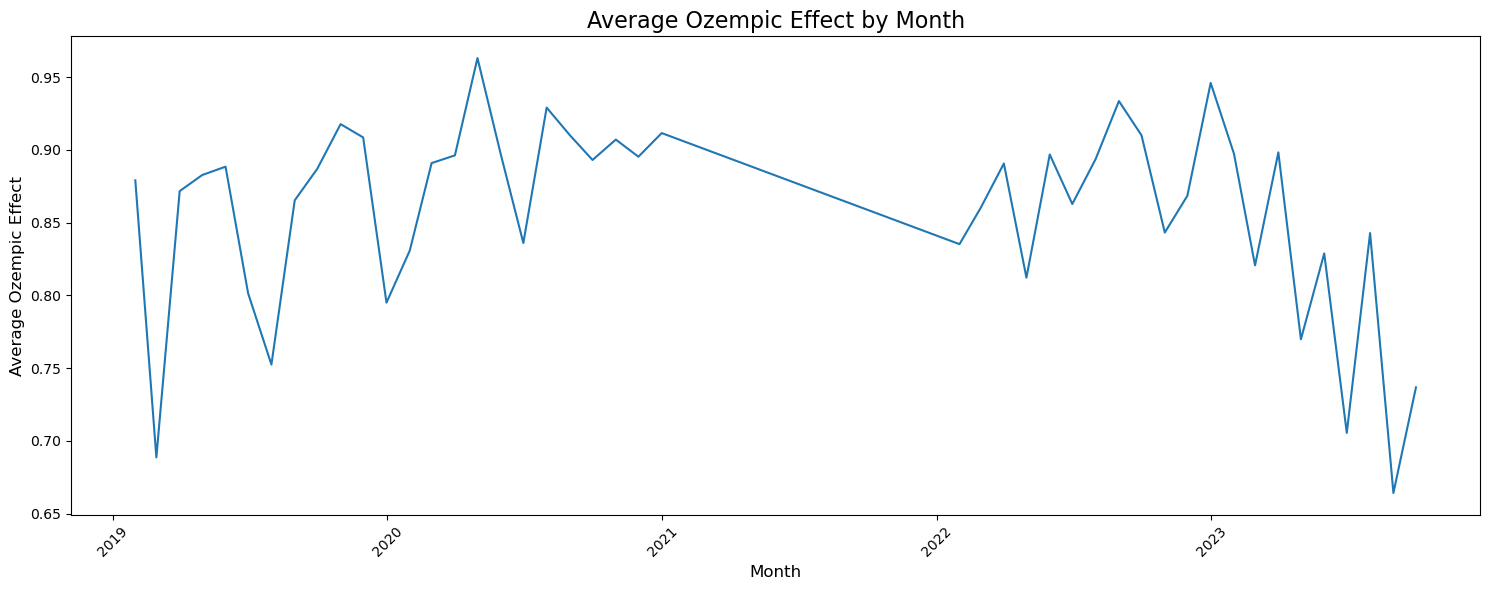

In [54]:
merged_df_final['claim_date'] = pd.to_datetime(merged_df_final['claim_date'])
monthly_stats = merged_df_final.resample('M', on='claim_date')['ozempic_effect'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_stats, x='claim_date', y='ozempic_effect')

# Set the title and labels
plt.title('Average Ozempic Effect by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Ozempic Effect', fontsize=12)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

The plot above shows the trend of the average effect of Ozempic (outcome variable) over time. Claim_date was not included in my previous model building, however, there is definitely potential impact that claim data has on the outcome. There are a couple sharp drops in the average effect. The below website contains an article where it discussed that many patients reported the loss of Ozempic effectivness in a long term. "Plateau"can happen where the medication that used to really have the effect is no longer having an effect due to developed tolerance of patients' body.  Also factors such as the patient population taking Ozempic could have changed over time. Also the patients' diet, exercise and other lifestyle could also influence the effectiveness of Ozempic over time. Other factors such as change of healthcare providers, medications supply can also change the Ozempic effect over time. 

https://www.businessinsider.com/why-do-weight-loss-drugs-stop-working-ozempic-plateau-explained-2023-12#:~:text=People%20say%20weight%2Dloss%20drugs,and%20how%20to%20avoid%20it&text=Many%20patients%20report%20that%20Ozempic,of%20developed%20tolerance%2C%20called%20tachyphylaxis.